In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


engine = create_engine('sqlite:///sncf_table.sqlite')
connexion = engine.connect()

## Partie 3

### Question 1

In [36]:
request = """SELECT code_uic, date, id
                FROM Lost_Item
                """
df_item = pd.read_sql(request, connexion, parse_dates=False)
df_item


,code_uic,date,id
0,0087271007,2016-01-31T21:49:49+00:00,46aa8bd680d64ff47521f2f9565b3af08101f777
1,0087271007,2016-01-31T21:30:04+00:00,1429134dd10f77c7c671483321efee8b13b0a566
2,0087773002,2016-01-31T21:29:14+00:00,924a6fe7511fe141cb270665f2047ecdd2992efa
3,0087773002,2016-01-31T21:27:25+00:00,4232bb601ebfe57bff6005540ae6bf34254464db
4,0087271007,2016-01-31T21:23:22+00:00,92bb57fd33d69e655f519b3ccc321f1f62583407
...,...,...,...
481297,0087683268,2021-12-01T07:24:00+00:00,8b42bc917b8b5c638bc28d521a575e64954700b1
481298,0087212027,2021-12-01T07:11:54+00:00,9a2c4bc35885a627d404c6091f59d05bddafc8c8
481299,0087411017,2021-12-01T05:44:51+00:00,78590bbae89c18bbb148f8c67703e288691f32ae
481300,0087723197,2021-12-01T05:25:12+00:00,0d523cedaf517d472690f8056a650ef4ba48a8a0


In [37]:
df_item['date'] = df_item['date'].apply(lambda x : x[:10])
df_item

,code_uic,date,id
0,0087271007,2016-01-31,46aa8bd680d64ff47521f2f9565b3af08101f777
1,0087271007,2016-01-31,1429134dd10f77c7c671483321efee8b13b0a566
2,0087773002,2016-01-31,924a6fe7511fe141cb270665f2047ecdd2992efa
3,0087773002,2016-01-31,4232bb601ebfe57bff6005540ae6bf34254464db
4,0087271007,2016-01-31,92bb57fd33d69e655f519b3ccc321f1f62583407
...,...,...,...
481297,0087683268,2021-12-01,8b42bc917b8b5c638bc28d521a575e64954700b1
481298,0087212027,2021-12-01,9a2c4bc35885a627d404c6091f59d05bddafc8c8
481299,0087411017,2021-12-01,78590bbae89c18bbb148f8c67703e288691f32ae
481300,0087723197,2021-12-01,0d523cedaf517d472690f8056a650ef4ba48a8a0


In [38]:
df_item = df_item.groupby(['code_uic','date'])['id'].count()
# df_item.reset_index(inplace=True)
df_item

code_uic    date      
0087111849  2016-01-01    3
            2016-01-03    5
            2016-01-04    2
            2016-01-05    1
            2016-01-07    3
                         ..
0087785006  2016-01-06    1
            2016-01-11    1
            2016-08-07    1
            2016-08-15    1
            2016-09-05    1
Name: id, Length: 109946, dtype: int64

In [29]:
request = """SELECT temperature, date
                FROM temperature
                GROUP BY date
                """

df_temp = pd.read_sql(request, connexion, parse_dates=True)
df_temp

,temperature,date
0,4.825000000000024,2016-01-01
1,3.575000000000017,2016-01-02
2,1.8625000000000256,2016-01-03
3,2.000000000000014,2016-01-04
4,3.2375000000000256,2016-01-05
...,...,...
2187,1.5500000000000185,2021-12-27
2188,2.8500000000000227,2021-12-28
2189,5.4750000000000085,2021-12-29
2190,6.775000000000013,2021-12-30


In [30]:
df = pd.merge(df_item, df_temp, on='date', how='inner')
df.head(10)

,date,id,temperature
0,2016-01-01,3,4.825000000000024
1,2016-01-01,1,4.825000000000024
2,2016-01-01,7,4.825000000000024
3,2016-01-01,1,4.825000000000024
4,2016-01-01,1,4.825000000000024
5,2016-01-01,3,4.825000000000024
6,2016-01-01,1,4.825000000000024
7,2016-01-01,2,4.825000000000024
8,2016-01-01,1,4.825000000000024
9,2016-01-01,1,4.825000000000024


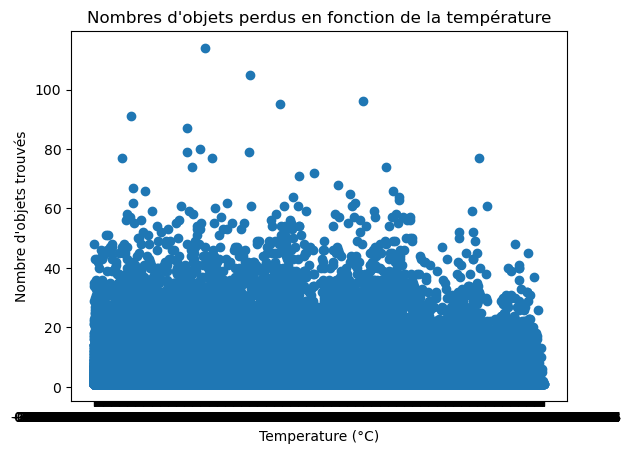

In [24]:
plt.scatter(df['temperature'], df['id'])
plt.title("Nombres d'objets perdus en fonction de la température")
plt.xlabel('Temperature (°C)')
plt.ylabel("Nombre d'objets trouvés")
plt.show()